In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
df = pd.read_csv("../data/final_landslides.csv",index_col=0)

In [48]:
print(f'Class ratio is {(df["true_slide"].sum() / len(df))}')

Class ratio is 0.1727755703379615


# Neural Net

In [49]:
nn_training_data = pd.read_csv('../data/model_output/nn_training_data.csv', index_col=0)
test_data = nn_training_data[['Fold Number', 'Epoch', 'Validation Loss', 'Validation Accuracy', 
                              'Validation Recall', 'Validation Precision', 'Validation AUC']]
nn_training_data = nn_training_data.drop(['Validation Loss', 'Validation Accuracy', 'Validation Recall', 
                                          'Validation Precision', 'Validation AUC'], 1)
test_data = test_data.rename(columns={'Validation Loss': 'Binary Cross-Entropy Loss', 'Validation Accuracy': 'Accuracy',
                                      'Validation Recall': 'Recall', 'Validation Precision': 'Precision', 'Validation AUC': 'AUC'})
nn_training_data['Validation'] = 0
test_data['Validation'] = 1
nn_training_data = pd.concat([nn_training_data, test_data])

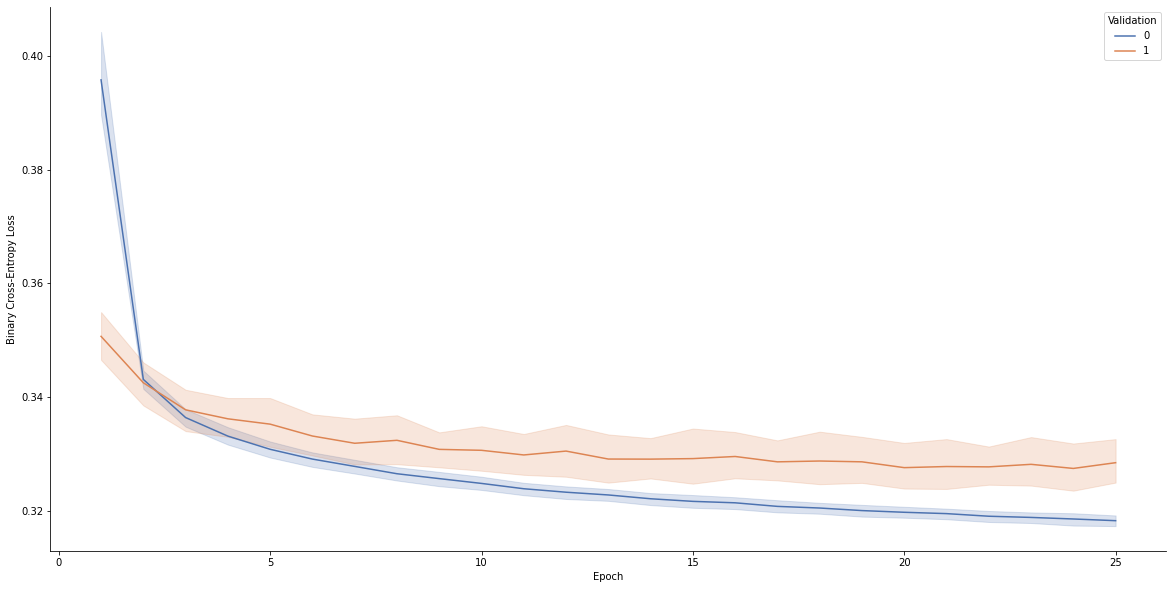

In [50]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Binary Cross-Entropy Loss', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_loss.png')

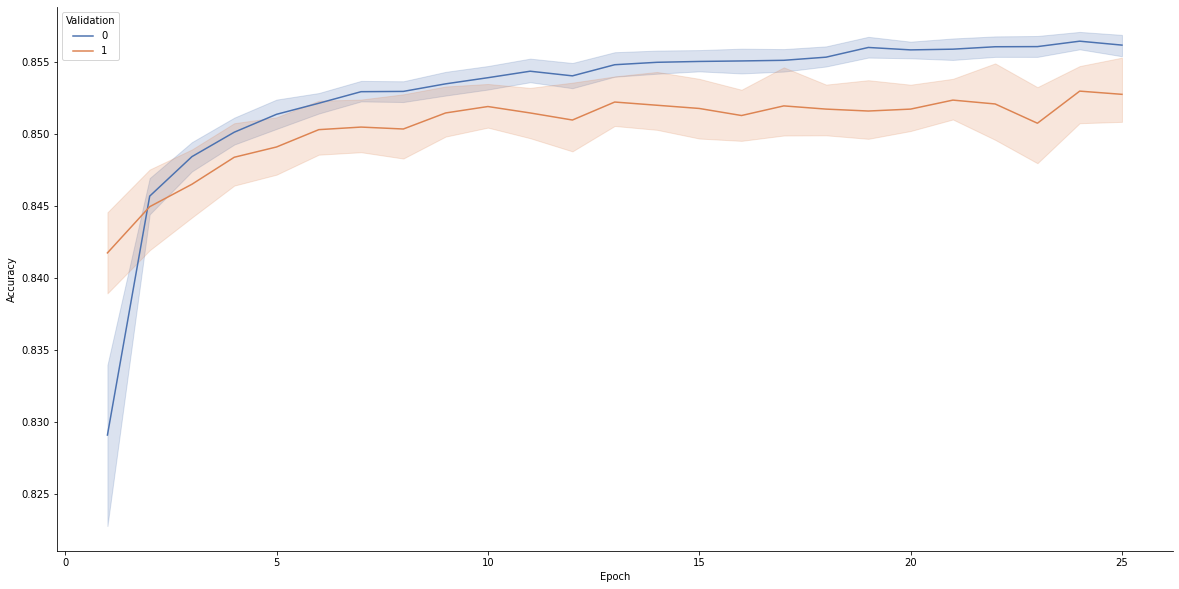

In [51]:
sns.lineplot(data=nn_training_data, x='Epoch', y='Accuracy', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_accuracy.png')

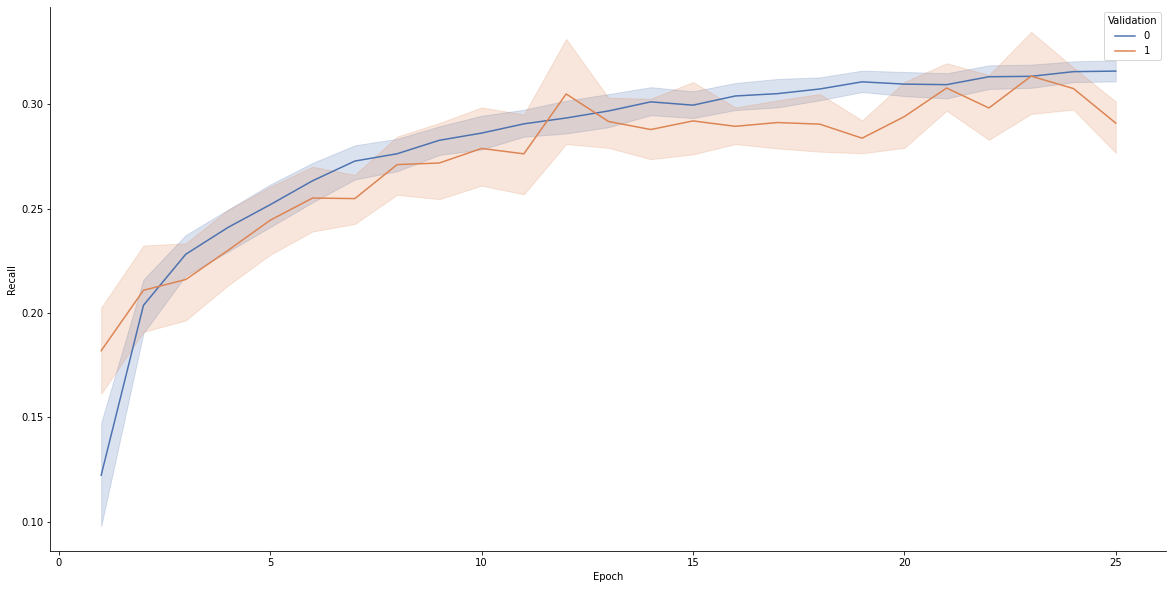

In [52]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Recall', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_recall.png')

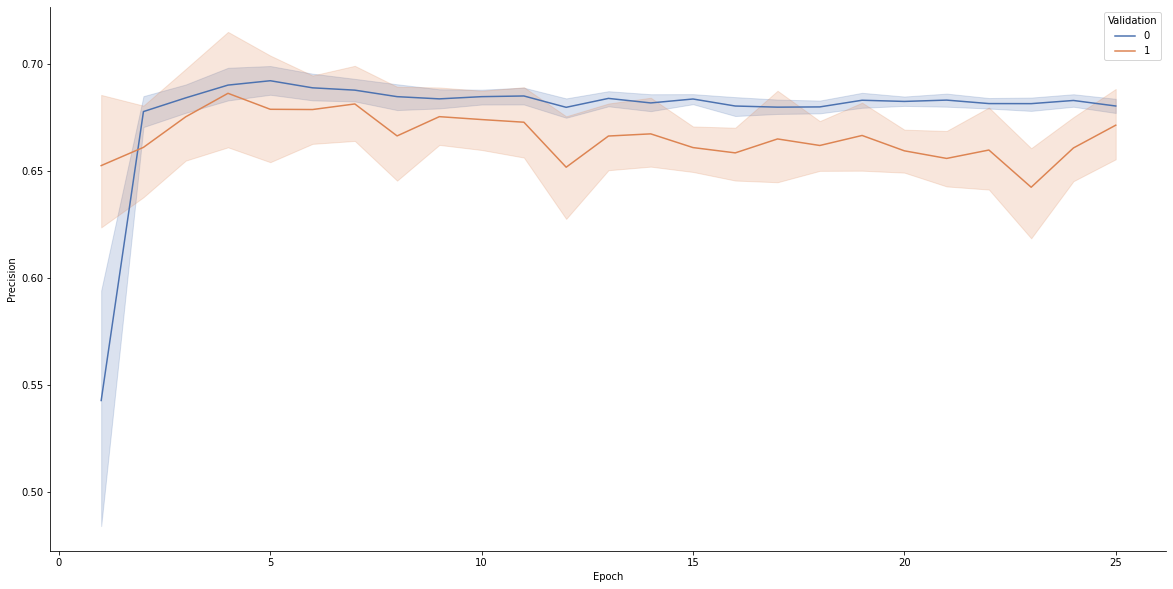

In [53]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.lineplot(data=nn_training_data, x='Epoch', y='Precision', 
             hue='Validation', palette='deep');
sns.despine();
plt.savefig('../img/nn_training_test_precision.png')

In [36]:
nn_test_data = pd.read_csv('../data/model_output/nn_comparable_test_data.csv')
nn_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']

In [37]:
nn_test_data.head()

,Fold,Log Loss,Accuracy,AUC,Precision,Recall
0,1,5.150005,0.850893,0.646159,0.629268,0.333333
1,2,5.042067,0.854018,0.640893,0.663043,0.315245
2,3,5.072901,0.853125,0.627065,0.681250,0.281654
3,4,5.227098,0.848661,0.631522,0.630435,0.299742
4,5,5.257932,0.847768,0.617694,0.643750,0.266150


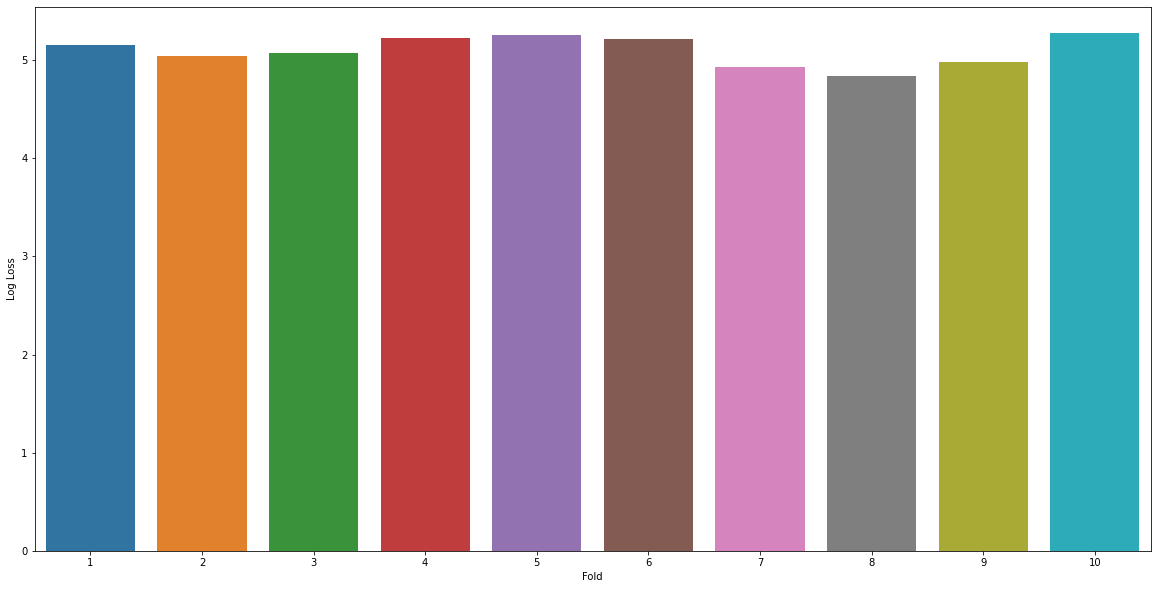

In [38]:
ax = sns.barplot(x="Fold", y="Log Loss", data=nn_test_data)

# XGBoost

In [59]:
xgb_fi = pd.read_csv('../data/model_output/xgb_feature_importances.csv')
xgb_test_data = pd.read_csv('../data/model_output/xgb_test_data.csv')
xgb_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']
xgb_test_data['Fold'] = xgb_test_data['Fold']+1

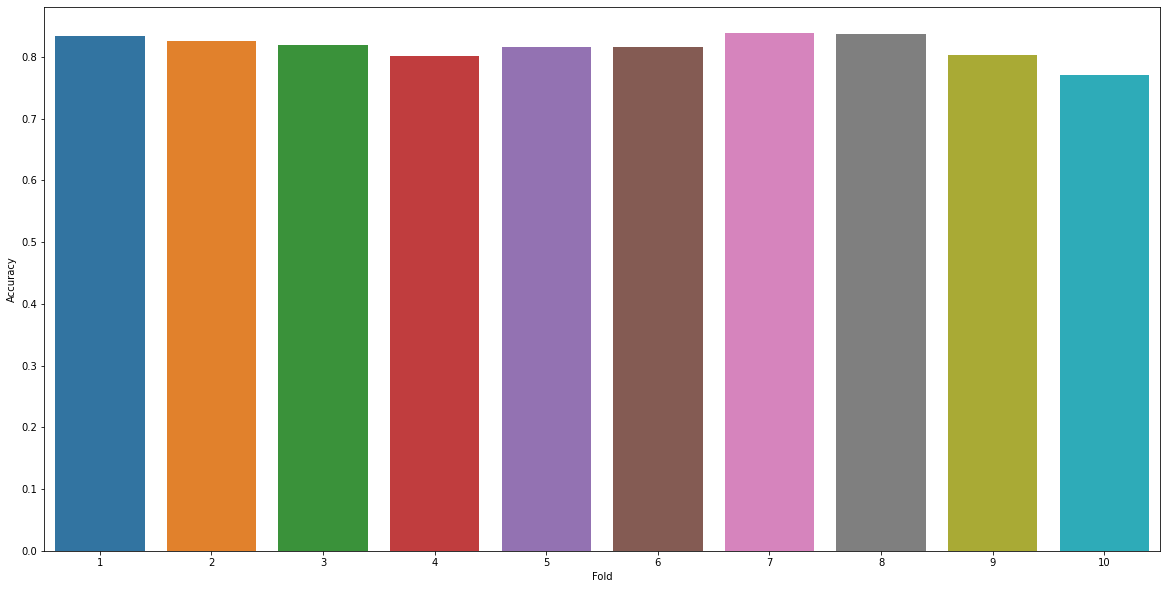

In [60]:
ax = sns.barplot(x="Fold", y="Accuracy", data=xgb_test_data)

# Logit

In [62]:
lr_coeff = pd.read_csv('../data/model_output/logit_coefficients.csv', index_col=0)
logit_test_data = pd.read_csv('../data/model_output/logit_test_data.csv')
logit_test_data.columns = ['Fold', 'Log Loss', 'Accuracy', 'AUC', 'Precision', 'Recall']
logit_test_data.head()

,Fold,Log Loss,Accuracy,AUC,Precision,Recall
0,1,6.398975,0.814732,0.605904,0.444000,0.286822
1,2,5.890140,0.829464,0.636274,0.509653,0.341085
2,3,6.013494,0.825893,0.630027,0.494208,0.330749
3,4,5.674269,0.835714,0.644140,0.537549,0.351421
4,5,5.859301,0.830357,0.634769,0.513834,0.335917


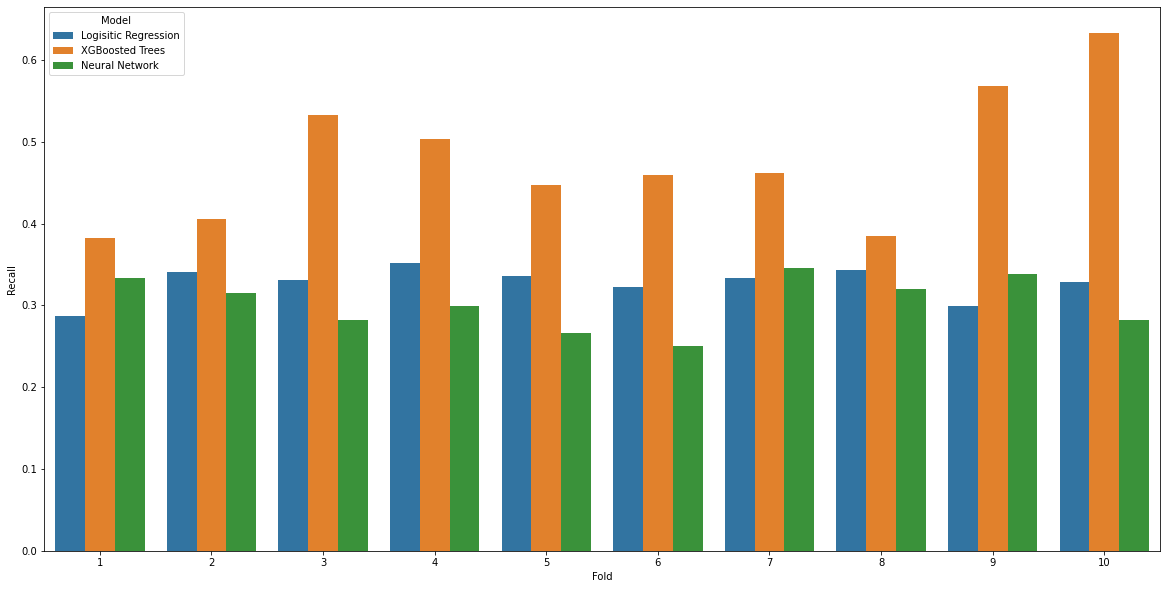

In [63]:
logit_test_data['Model'] = 'Logisitic Regression'
xgb_test_data['Model'] = 'XGBoosted Trees'

nn_test_data['Model'] = 'Neural Network'
test_df = pd.concat([logit_test_data, xgb_test_data, nn_test_data])
ax = sns.barplot(x="Fold", y="Recall", hue='Model', data=test_df)